# Dropout - *optional exercise*

**Note**: This exercise is optional and using dropout is not required to pass beyond the linear regime of the scoring function for your fully connected network.

Dropout [1] is a technique for regularizing neural networks by randomly setting some features to zero during the forward pass. In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.

[1] Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012

In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from dl4cv.classifiers.fc_net import *
from dl4cv.data_utils import get_CIFAR10_data
from dl4cv.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from dl4cv.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
    print('%s: ' % k, v.shape)

X_train:  (48000, 3, 32, 32)
y_train:  (48000,)
y_test:  (1000,)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
X_val:  (1000, 3, 32, 32)


# Dropout forward pass
In the file `dl4cv/layers.py`, implement the forward pass for dropout. Since dropout behaves differently during training and testing, make sure to implement the operation for both modes.

Once you have done so, run the cell below to test your implementation.

In [3]:
x = np.random.randn(500, 500) + 10

for p in [0.3, 0.6, 0.75]:
    out, _ = dropout_forward(x, {'mode': 'train', 'p': p})
    out_test, _ = dropout_forward(x, {'mode': 'test', 'p': p})

    print('Running tests with p = ', p)
    print('Mean of input: ', x.mean())
    print('Mean of train-time output: ', out.mean())
    print('Mean of test-time output: ', out_test.mean())
    print('Fraction of train-time output set to zero: ', (out == 0).mean())
    print('Fraction of test-time output set to zero: ', (out_test == 0).mean())
    print()

Running tests with p =  0.3
Mean of input:  9.99897071693
Mean of train-time output:  10.0323445945
Mean of test-time output:  9.99897071693
Fraction of train-time output set to zero:  0.698872
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.6
Mean of input:  9.99897071693
Mean of train-time output:  10.0147236694
Mean of test-time output:  9.99897071693
Fraction of train-time output set to zero:  0.399092
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.75
Mean of input:  9.99897071693
Mean of train-time output:  9.99678594088
Mean of test-time output:  9.99897071693
Fraction of train-time output set to zero:  0.250144
Fraction of test-time output set to zero:  0.0



# Dropout backward pass
In the file `dl4cv/layers.py`, implement the backward pass for dropout. After doing so, run the following cell to numerically gradient-check your implementation.

In [4]:
x = np.random.randn(10, 10) + 10
dout = np.random.randn(*x.shape)

dropout_param = {'mode': 'train', 'p': 0.8, 'seed': 123}
out, cache = dropout_forward(x, dropout_param)
dx = dropout_backward(dout, cache)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_forward(xx, dropout_param)[0], x, dout)

print('dx relative error: ', rel_error(dx, dx_num))

123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
dx relative error:  5.44561004175e-11


# Fully-connected nets with Dropout
In the file `dl4cv/classifiers/fc_net.py`, modify your implementation to use dropout. Specificially, if the constructor the the net receives a nonzero value for the `dropout` parameter, then the net should add dropout immediately after every ReLU nonlinearity. After doing so, run the following to numerically gradient-check your implementation.

In [5]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for dropout in [0, 0.25, 0.5]:
    print('Running check with dropout = ', dropout)
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                              weight_scale=5e-2, dtype=np.float64,
                              dropout=dropout, seed=123)

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
    print()

Running check with dropout =  0
Initial loss:  2.3051948274
W1 relative error: 2.53e-07
W2 relative error: 1.50e-05
W3 relative error: 2.75e-07
b1 relative error: 2.94e-06
b2 relative error: 5.05e-08
b3 relative error: 1.17e-10

Running check with dropout =  0.25
Initial loss:  2.30239323056
W1 relative error: 3.39e-07
W2 relative error: 2.24e-07
W3 relative error: 1.97e-07
b1 relative error: 3.68e-08
b2 relative error: 5.47e-09
b3 relative error: 7.54e-11

Running check with dropout =  0.5
Initial loss:  2.30134643809
W1 relative error: 1.29e-07
W2 relative error: 3.95e-07
W3 relative error: 4.28e-07
b1 relative error: 6.99e-09
b2 relative error: 2.82e-09
b3 relative error: 8.93e-11



# Regularization experiment
As an experiment, we will train a pair of two-layer networks on 500 training examples: one will use no dropout, and one will use a dropout probability of 0.75. We will then visualize the training and validation accuracies of the two networks over time.

In [6]:
# Train two identical nets, one with dropout and one without

num_train = 500
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}
dropout_choices = [0, 0.75]
for dropout in dropout_choices:
    model = FullyConnectedNet([500], dropout=dropout)
    print("dropout = ", dropout)

    solver = Solver(model, small_data,
                    num_epochs=25, batch_size=100,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': 5e-4,
                    },
                    verbose=True, print_every=100)
    solver.train()
    solvers[dropout] = solver

dropout =  0
(Iteration 1 / 125) loss: 8.899727
(Epoch 0 / 25) train acc: 0.236000; val_acc: 0.164000
(Epoch 1 / 25) train acc: 0.406000; val_acc: 0.222000
(Epoch 2 / 25) train acc: 0.452000; val_acc: 0.206000
(Epoch 3 / 25) train acc: 0.556000; val_acc: 0.186000
(Epoch 4 / 25) train acc: 0.714000; val_acc: 0.255000
(Epoch 5 / 25) train acc: 0.772000; val_acc: 0.259000
(Epoch 6 / 25) train acc: 0.798000; val_acc: 0.227000
(Epoch 7 / 25) train acc: 0.806000; val_acc: 0.241000
(Epoch 8 / 25) train acc: 0.864000; val_acc: 0.221000
(Epoch 9 / 25) train acc: 0.890000; val_acc: 0.229000
(Epoch 10 / 25) train acc: 0.934000; val_acc: 0.255000
(Epoch 11 / 25) train acc: 0.946000; val_acc: 0.263000
(Epoch 12 / 25) train acc: 0.954000; val_acc: 0.282000
(Epoch 13 / 25) train acc: 0.966000; val_acc: 0.268000
(Epoch 14 / 25) train acc: 0.976000; val_acc: 0.273000
(Epoch 15 / 25) train acc: 0.964000; val_acc: 0.262000
(Epoch 16 / 25) train acc: 0.972000; val_acc: 0.265000
(Epoch 17 / 25) train acc: 

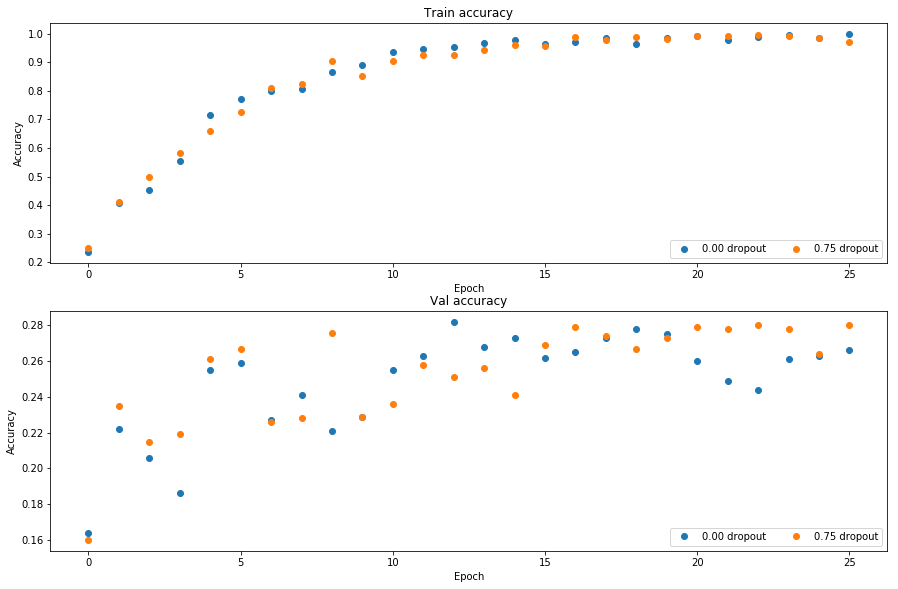

In [7]:
# Plot train and validation accuracies of the two models

train_accs = []
val_accs = []
for dropout in dropout_choices:
    solver = solvers[dropout]
    train_accs.append(solver.train_acc_history[-1])
    val_accs.append(solver.val_acc_history[-1])

plt.subplot(3, 1, 1)
for dropout in dropout_choices:
    plt.plot(solvers[dropout].train_acc_history, 'o', label='%.2f dropout' % dropout)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for dropout in dropout_choices:
    plt.plot(solvers[dropout].val_acc_history, 'o', label='%.2f dropout' % dropout)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Describe the results of this experiment and try to reason why you got these results.</p>
    <p>**Your answer:**</p>
</div>